In [2]:
# Define mesh geometry and boundary conditions

Lx = 1 #width of domain
Ly = 1 #height of domain

fac = 1

nx = 8      #number of control volumes in the x-direction
ny = 8    #number of control volumes in the y-direction


In [3]:
# import matplotlib.pyplot as plt
# import numpy as np

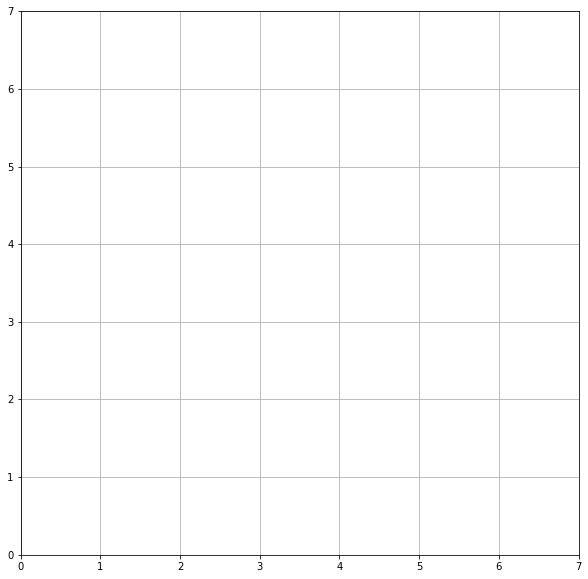

In [4]:
# Visualise Mesh
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10*(Lx/Ly)))
plt.xticks(np.arange(0, nx, 1))
plt.yticks(np.arange(0, ny, 1))

plt.rc('grid', linestyle="-", color='black')
# plt.scatter(x, y)
plt.grid(True)
plt.rc('grid', linestyle="-", color='black')


plt.show()

In [5]:
## Define required variables

tf = 2           #total time in seconds
dx = Lx/nx          #length of each control volume in the x-direction
dy = Ly/ny          #length of each control volume in the y-direction
dt = tf/2          #size of time steps
Sfx = dy            #area vector x component (Area of East and West Faces)
Sfy = dx            #area vector y component (Area of North and South Faces)


In [6]:
## Define  position and time vectors

t = np.array(np.arange(0,tf, dt))        #time vector (could possibly use a list)
x = np.zeros((1,nx+2))   #position vector defining the center points of the control volumes in the x-direction.
x[0,nx+1] = Lx
x[0,1:nx+1] = np.arange(dx/2,Lx,dx)

t = np.array(np.arange(0,tf, dt))        #time vector (could possibly use a list)
y = np.zeros((1,ny+2))   #position vector defining the center points of the control volumes in the y-direction.
y[0,ny+1] = Ly
y[0,1:ny+1] = np.arange(dy/2,Ly,dy)



In [7]:
## Define required displacement matrices and b vector

u_new = np.zeros([(ny+2)*(nx+2),2])         #unknown displacements at t + 1    (Column 1 = x, Column2 = y)
u_old = np.zeros([(ny+2)*(nx+2),2])         #displacement at time t
u_old_old = np.zeros([(ny+2)*(nx+2),2])     #displacement at time t - 1

#rhs vector
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

dispx, dispy = np.meshgrid(x, y)

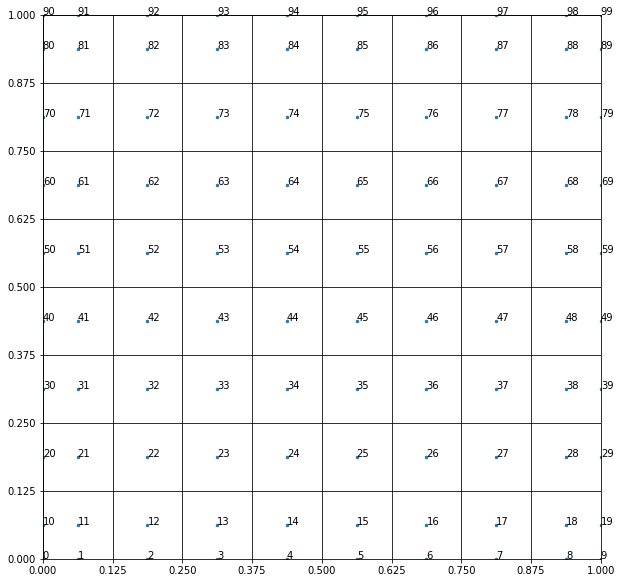

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
# Visualise Mesh
import matplotlib.pyplot as plt
import numpy as np

labels = np.arange(0,len(dispx)*len(dispy),1)

plt.figure(figsize=(10, 10*(Lx/Ly)))
plt.xticks(np.arange(0, Lx+1, Lx/nx))
plt.yticks(np.arange(0, Ly+1, Ly/ny))
plt.xlim(0, Lx)
plt.ylim(0, Ly)

plt.rc('grid', linestyle="--", color='black')
# plt.scatter(x, y)
plt.grid(True)
plt.rc('grid', linestyle="--", color='black')
plt.scatter(dispx, dispy, s = 6)

dispx_new = dispx.reshape(len(dispx)*len(dispy), 1)
dispy_new = dispy.reshape(len(dispx)*len(dispy), 1)

for i in labels:
    plt.annotate(str(i), xy=(dispx_new[i][0],dispy_new[i][0]))

# plt.annotate(str(0), xy=(dispx_new[0][0],dispy_new[0][0]))

plt.show()

labels

In [9]:
# Cantilever Setup 

tr_right_x = 0    #u boundary condition at the right boundary
tr_right_y = - 1e6   #v boundary condition at the right boundary

tr_top_x = 0    #u boundary condition at the top boundary
tr_top_y = 0       #v boundary condition at the top boundary

tr_bottom_x = 0    #u boundary condition at the bottom boundary 
tr_bottom_y = 0  #v boundary condition at the bottom boundary

u_left = 0
v_left = 0
